# <center> <img src="media/casased.png" width="200"/> </center>
# <center> Casablanca Stock Exchange Data Guide </center>

**casased** is a Python library designed to retrieve financial data from the Casablanca Stock Exchange (Bourse de Casablanca) via the Medias24 API.

### Key Features
*   **Historical Data**: OHLCV data for stocks and indices.
*   **Intraday Data**: Real-time price tracking.
*   **Market Analysis**: Index compositions and weightings.
*   **Fundamental Data**: Stock indicators and dividend history.
*   **Cloudflare Bypass**: Automatic handling of 403 errors using browser automation.

This guide illustrates the main features of the library with visual examples.

In [1]:
# Install the package (with optional dependencies for Cloudflare bypass)
# !pip install casased[cloudflare]
# OR
# !pip install casased nodriver seleniumbase

In [2]:
import casased as cas
import pandas as pd
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_rows', 10)
print(f"casased version: {cas.__version__}")
print(f"Available assets: {len(cas.notation())}")

casased version: 0.1.5
Available assets: 81


## 1. Market Overview

Get a recap of the main market indices (MASI, MASI.20, etc.).

<img src="media/indice_01.PNG" width="800"/>

In [3]:
# Retrieve index summary
indices = cas.getIndex()

# Display MASI data
masi_info = indices.get('Resume indice', {}).get('MASI', {})
pd.DataFrame([masi_info])

""
0


## 2. Asset Weightings (Pondération)

View the weight of each stock in the main indices.

<img src="media/ponderation_01.PNG" width="600"/>

In [4]:
# Get weights for all listed companies
weights = cas.getPond()
df_weights = pd.DataFrame(weights)
df_weights.head()

,Code Isin,Instrument,Nombre de titres,Cours,Facteur flottant,Facteur plafonnement,Capitalisation flottante,Poids


## 3. Historical Data

Retrieve daily OHLCV (Open, High, Low, Close, Volume) data.

**Note on Cloudflare:** If the API returns a 403 error, the library automatically launches a headless browser (nodriver/seleniumbase) to bypass the protection and retrieve the data. This is completely transparent to you but may add a few seconds to the request.

Fetching history for Attijariwafa...


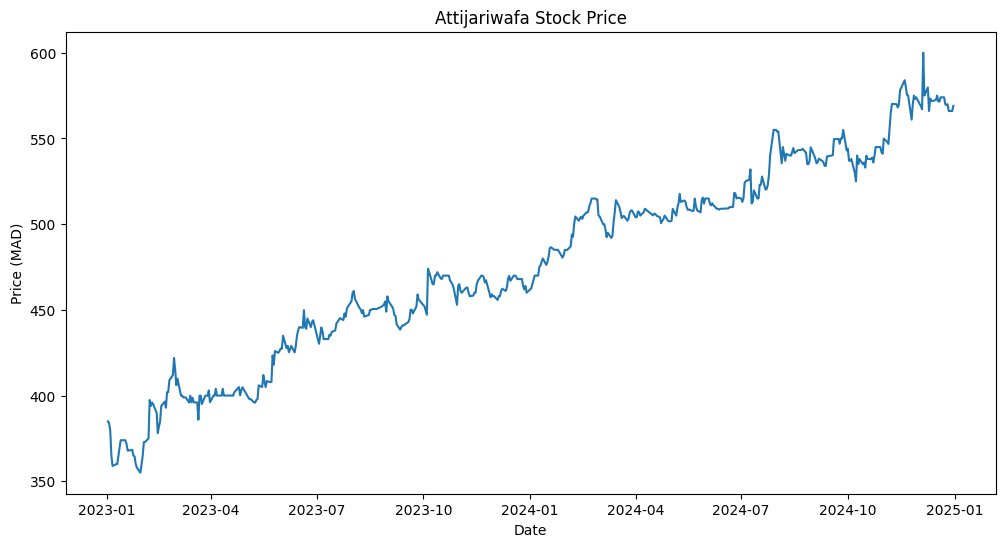

,Value,Min,Max,Variation,Volume
Date,,,,,
2024-12-25,569.5,565.0,575.0,-0.09,25665
2024-12-26,570.0,565.7,573.0,0.09,556229
2024-12-27,566.0,565.0,569.0,-0.70,102909
2024-12-30,566.0,560.0,566.0,0.00,106307
2024-12-31,569.0,564.5,571.5,0.53,59239


In [5]:
# Get historical data for a specific stock (e.g., Attijariwafa Bank)
stock_name = 'Attijariwafa'
print(f"Fetching history for {stock_name}...")

df = cas.get_history(stock_name, start='2023-01-01', end='2024-12-31')

if not df.empty:
    # Plotting the closing price
    plt.figure(figsize=(12, 6))
    df['Value'].plot(title=f'{stock_name} Stock Price')
    plt.ylabel('Price (MAD)')
    plt.show()

    display(df.tail())
else:
    print("Data not available.")

## 4. Intraday Data

Monitor real-time price movements during the trading session.

In [10]:
# Get intraday data for a stock
# (Returns empty dataframe if outside trading hours or no transactions)
try:
    intraday = cas.get_intraday('BCP')

    if not intraday.empty:
        if 'Value' in intraday.columns:
            print("Intraday transactions found:")
            display(intraday.head())
            
            # Simple intraday plot
            plt.figure(figsize=(10, 4))
            # Convert index (datetime.time) to string for simple plotting or keep as is
            times = [t.strftime("%H:%M") for t in intraday.index]
            plt.plot(times, intraday['Value'])
            plt.title('BCP Intraday Movement')
            plt.xlabel('Time')
            plt.ylabel('Price')
            # Reduce x-ticks if too many
            if len(times) > 10:
                plt.xticks(times[::len(times)//10])
            plt.show()
        elif 'result' in intraday.columns:
            print("Raw data returned (parsing structure changed):")
            # Try to show something useful or just raw
            display(intraday.iloc[0]['result'])
    else:
        print("No intraday data available currently (market closed?)")
except Exception as e:
    print(f"Error fetching intraday: {e}")

No intraday data available currently (market closed?)


## 5. Fundamental Data & Dividends

Access company indicators and dividend history.

<img src="media/indicateur_02.png" width="800"/>

In [11]:
# Get key indicators for a company
indicators = cas.getKeyIndicators('Maroc Telecom')
info = indicators.get('Info_Societe', {})

print(f"Sector: {info.get('Secteur activite')}")
print(f"Capital: {info.get('Capital')}")

# Get dividend history
dividends = cas.getDividend('Maroc Telecom')
pd.DataFrame(dividends).head()

Sector: None
Capital: None


""
